## Лабораторна робота №2.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [85]:
# завантажити датасет
titanic_df = pd.read_csv('./titanic.csv')

In [86]:
# перевірити чи немає дублів PassengerId
titanic_df['PassengerId'].is_unique

# встановимо PassengerId як index of DataFrame
titanic_df = titanic_df.set_index('PassengerId')

In [87]:
# вивести розмірніть датасету
titanic_df.shape

(891, 11)

In [88]:
# перевірити типи змінних і кількість данних по кожній змінній
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [89]:
# вивести основну статистичну інформацію по числовим змінним
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [90]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Ваші висновки**: виконавши 'Завдання 1', ми встановили глобальний індекс датафрейму як PassengerId для більш комфортної роботи з даними, оглянули основні статистичні дані числових атрибутів, що може допомогти в швидкому ознайомленні з даними; виконавши 'Завдання 2', ми перевірили атрибути які мають пусті значення та яка кількість таких значень.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



In [91]:
titanic_df_pearson_corr = titanic_df.corr(numeric_only=True)
titanic_df_pearson_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


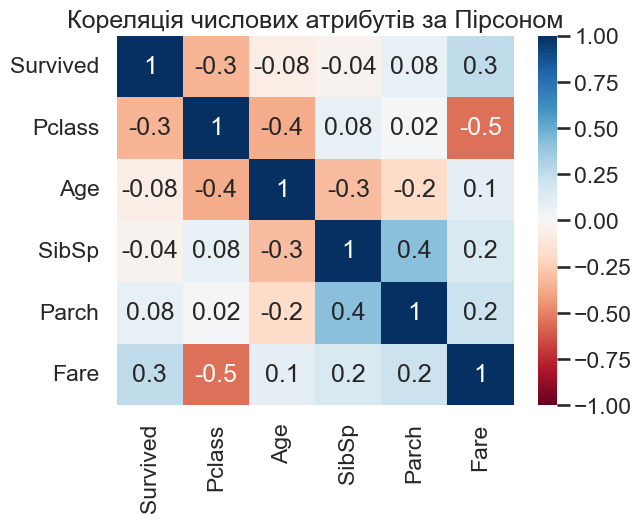

In [92]:
# plt.figure(figsize=(10, 7))
sns.heatmap(titanic_df_pearson_corr, annot=True, fmt='.1g', vmin=-1.0, vmax=1.0, center=.0, cmap="RdBu").set_title('Кореляція числових атрибутів за Пірсоном')
plt.show()

**Ваші висновки:** виконавши 'Завдання 3', ми побудували матрицю коефіцієнтів кореляції за методом Пірсона. Відобразивши отримані дані, ми з легкістю можемо зробити висновки кореляції даних атрибутів, так, наприклад, найменш залежні відношення з дуже слабою кореляцією, майже, нульовим коефіцієнтом є наявність братів, сестер (SibSp), батьків, дітей (Parch) до пасажирського класу, а ось саме очевидне, це вплив вартості проїзду (Fare) на пасажирьский клас - тут все логічно, в більшості випадків, більше витратив - скоріш за все маєш кращий клас, але все одно це рахуеється як слаба по силі від'ємна кореляція.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [93]:
def fillna_median(df: pd.DataFrame, col: str, groups: list[str]) -> pd.DataFrame:
    df[col] = df[col].fillna(df.groupby(groups)[col].transform('median'))
    return df

In [94]:
# перевірка функції fillna_median
nan_df_sample = titanic_df[titanic_df['Age'].isna()].sample(4)
not_nan_df_sample = titanic_df[titanic_df['Age'].notna()].sample(8)
test_df = pd.concat([nan_df_sample, not_nan_df_sample])
print(test_df[['Name', 'Age']])
print('*'*80)
print(fillna_median(test_df, 'Age', ['Sex'])[['Name', 'Age']])

                                           Name   Age
PassengerId                                          
385                      Plotcharsky, Mr. Vasil   NaN
767                   Brewe, Dr. Arthur Jackson   NaN
826                             Flynn, Mr. John   NaN
127                         McMahon, Mr. Martin   NaN
321                          Dennis, Mr. Samuel  22.0
371                 Harder, Mr. George Achilles  25.0
786          Harmer, Mr. Abraham (David Lishin)  25.0
114                     Jussila, Miss. Katriina  20.0
233                   Sjostedt, Mr. Ernst Adolf  59.0
109                             Rekic, Mr. Tido  38.0
809                           Meyer, Mr. August  39.0
720                Johnson, Mr. Malkolm Joackim  33.0
********************************************************************************
                                           Name   Age
PassengerId                                          
385                      Plotcharsky, Mr. Vasil  33.0
7

In [95]:
titanic_df = fillna_median(titanic_df, 'Age', ['Sex'])

**Ваші висновки:** виконавши 'Завдання 4', ми навчилися аналізувати пусті значення та заповнювати їх медіанними величинами. Для цього ми використали вбудовану функцію *fillna()*, пусті значення ми заповнюємо по медіанним значенням груп, тобто ми групуємо 'Age' за потрібними артибутами *group_by(groups)*, такими ми взяли стать людини та трасформуємо NaN значення за медіаною 'Age' - *transform('median')*

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





In [96]:
# Розбиття віку пасажирів на контейнери від 0 до 5
titanic_df['Age_bin'] = pd.cut(x=titanic_df['Age'], bins=5, labels=[0, 1, 2, 3, 4])
titanic_df[['Age', 'Age_bin']]

,Age,Age_bin
PassengerId,,
1,22.0,1
2,38.0,2
3,26.0,1
4,35.0,2
5,35.0,2
...,...,...
887,27.0,1
888,19.0,1
889,27.0,1


In [97]:
print(titanic_df.groupby('Age_bin')['Survived'].count())

Age_bin
0    100
1    523
2    188
3     69
4     11
Name: Survived, dtype: int64


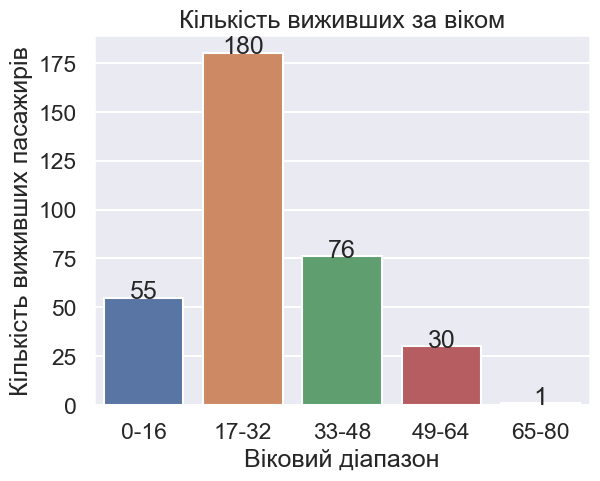

In [98]:
x = ['0-16', '17-32', '33-48', '49-64', '65-80']
y = titanic_df[titanic_df['Survived'] == 1].groupby('Age_bin')['Survived'].count().values.tolist()
ax = sns.barplot(x=x, y=y)
ax.set(title='Кількість виживших за віком', xlabel='Віковий діапазон', ylabel='Кількість виживших пасажирів')
ax.bar_label(ax.containers[0], padding=-4)
plt.show()

Ваші висновки: виконавши 'Завдання 5', ми навчились використовувати розбиття значень на категорії. Так, метод ```cut()``` розбиває потрібні значення на біни певної розмірності, в нашому випадку ми використовуємо розбиття віку на 5 частин по 16 років, бо максимальний вік становить 80 років, який являється зручним для ```cut()```

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

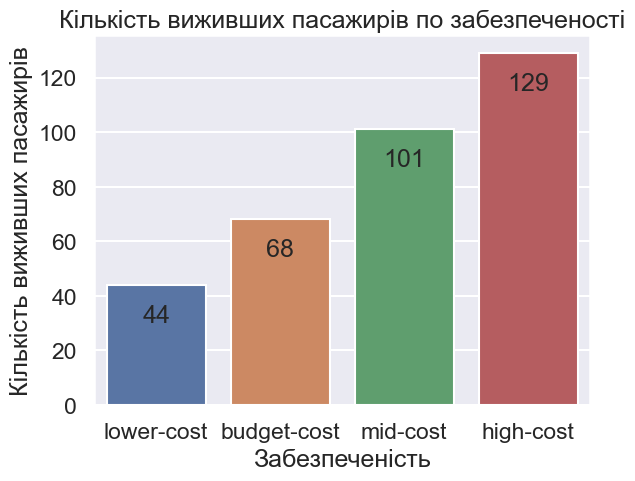

In [99]:
labels = ['lower-cost', 'budget-cost', 'mid-cost', 'high-cost']
titanic_df['Fare_bin'] = pd.qcut(titanic_df['Fare'], q=4, labels=labels)

y = titanic_df[titanic_df['Survived'] == 1].groupby('Fare_bin')['Survived'].count().values.tolist()
ax = sns.barplot(x=labels, y=y)
ax.bar_label(ax.containers[0], padding=-30)
ax.set(title='Кількість виживших пасажирів по забезпеченості', xlabel='Забезпеченість', ylabel='Кількість виживших пасажирів')
plt.show()

**Ваші висновки**: виконавши 'Завдання 6', ми перевірили, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та виявили, що гіпотеза вірна, доцільно використовувати кодування на цю змінну, бо розподіл забезпеченості різний, кількість виживших в вищих класах більша. 

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [100]:
titanic_df['Family_size'] = titanic_df['Parch'] + titanic_df['SibSp']
titanic_df['Alone'] = titanic_df['Family_size'] == 0

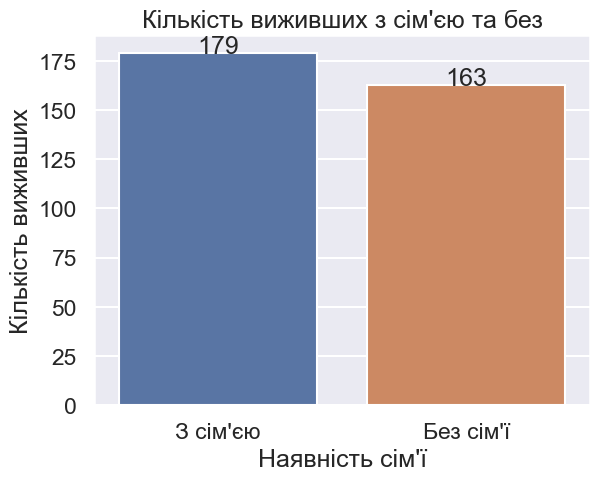

In [101]:
# перевірка гіпотези, що виживання пасажирів залежить від наявності сім'ї
x = ["З сім'єю", "Без сім'ї"]
y = titanic_df[titanic_df['Survived'] == 1].groupby('Alone')['Survived'].count().values.tolist()
ax = sns.barplot(x=x, y=y)
ax.set(title="Кількість виживших з сім'єю та без", xlabel="Наявність сім'ї", ylabel="Кількість виживших")
ax.bar_label(ax.containers[0], padding=-4)
plt.show()

**Ваші висновки**: виконавши 'Завдання 7', ми проаналізували залежність виживаємість від наявності сім'ї, так, створиши допоміжні атрибути `Family_size` та `Alone` та побудувавши стовпчикову діаграму, ми можемо сказати, що залежність мінімальна, бо різниця становить 6%, що, для такої кількості, є дуже малим значенням. 

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір. Створити колонку `Title` (Mr, Mrs)

In [102]:
import re

def extract_title(full_name):
    re_titles = '(Miss|Mr|Mrs|Ms)'
    if found := re.search(re_titles, full_name):
        return found.group()
    return None
    

titanic_df['Title'] = titanic_df['Name'].apply(extract_title)

In [103]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    object  
 11  Age_bin      891 non-null    category
 12  Fare_bin     891 non-null    category
 13  Family_size  891 non-null    int64   
 14  Alone        891 non-null    bool    
 15  Title        828 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(5), object(6)
memory usage: 100.5+ KB


In [104]:
to_drop = ['Cabin', 'Ticket', 'Parch', 'SibSp', 'Name']
titanic_df = titanic_df.drop(to_drop, axis=1)

**Ваші висновки**: виконавши 'Завдання 8', ми проаналізували нерелевантні атрибути, такі як `Cabin`, `Ticket`, `Parch`, `SibSp`, `Name`. З приводу `Cabin` є сумніви, бо визначивши, де знаходиться кабіна пасажира, ми можемо розрахувати які місця були більш безпечніші, але в даному датасеті маємо дуже багато пустих значень, тому і видаляємо. `Ticket` ніяк не може допомогти в аналізі, бо це звичайне випадкове значення. `Parch` та `SibSp`, бо ми вже маємо атрибути `Family_size` та `Alone`.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [105]:
def enumerate_list(l: list) -> dict:
    return {t: i for i, t in enumerate(l)}

In [106]:
# 1 - male
# 0 - female
titanic_df['Sex_binary'] = titanic_df['Sex'].apply(lambda x: int(x=='male'))

In [107]:
embarked_list = ["C", "S", "Q"]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
titanic_df['Embarked_num'] = titanic_df['Embarked'].apply(lambda x: enumerate_list(embarked_list).get(x))

In [108]:
title_list = ['Mr', 'Mrs', 'Miss', 'Ms']
titanic_df['Title_num'] = titanic_df['Title'].apply(lambda x: enumerate_list(title_list).get(x))

Ваші висновки: виконавши 'Завдання 9', ми використали конвертацію строкових даних в числові, для статі це перетворення буліану в число, в Embarked та Title це доступ до словника за ключем.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



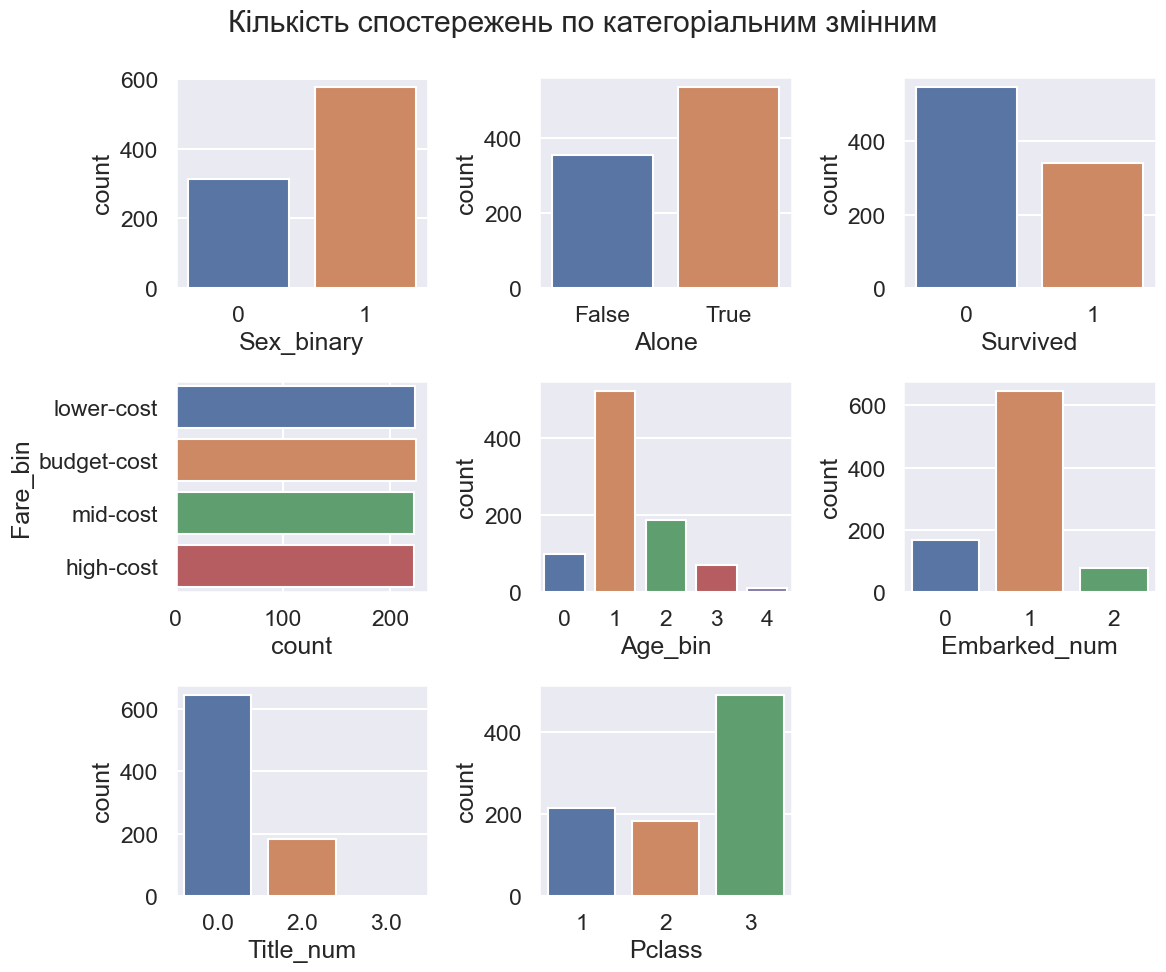

In [109]:
# Категоріальні змінні
categorical_attrs = ['Sex_binary', 'Alone', 'Survived', 'Fare_bin', 'Age_bin', 'Embarked_num', 'Title_num', 'Pclass']
ncols = 3
nrows = 3

plt.figure(figsize=(12, 10))
plt.gcf().suptitle('Кількість спостережень по категоріальним змінним')
for i, attr in enumerate(categorical_attrs):
    plt.subplot(nrows, ncols, i+1)
    y = None
    if attr == 'Fare_bin':
        y = attr
        attr = None
    sns.countplot(data=titanic_df, x=attr, y=y)

plt.gcf().tight_layout()
plt.show()

**Ваші висновки**: виконавши 'Завдання 10', ми виділили категоріальні змінні, а саме: `Sex_binary`, бо маємо жінок та чоловіків, `Alone`, бо маємо самотніх та з сім'єю, `Survived`, бо мажмо виживших та невиживших, `Fare_bin`, бо маємо малі, бюджетні, середні та великі затрати, `Age_bin`, бо маємо категорії по 16 років, `Embarked_num`, бо маємо всього три порта, `Pclass`, бо є три класи.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

C:\Users\fedos\AppData\Local\Temp\ipykernel_2204\256077713.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  titanic_df.select_dtypes(include=['float64', 'int64']).hist(ax = plt.gca())


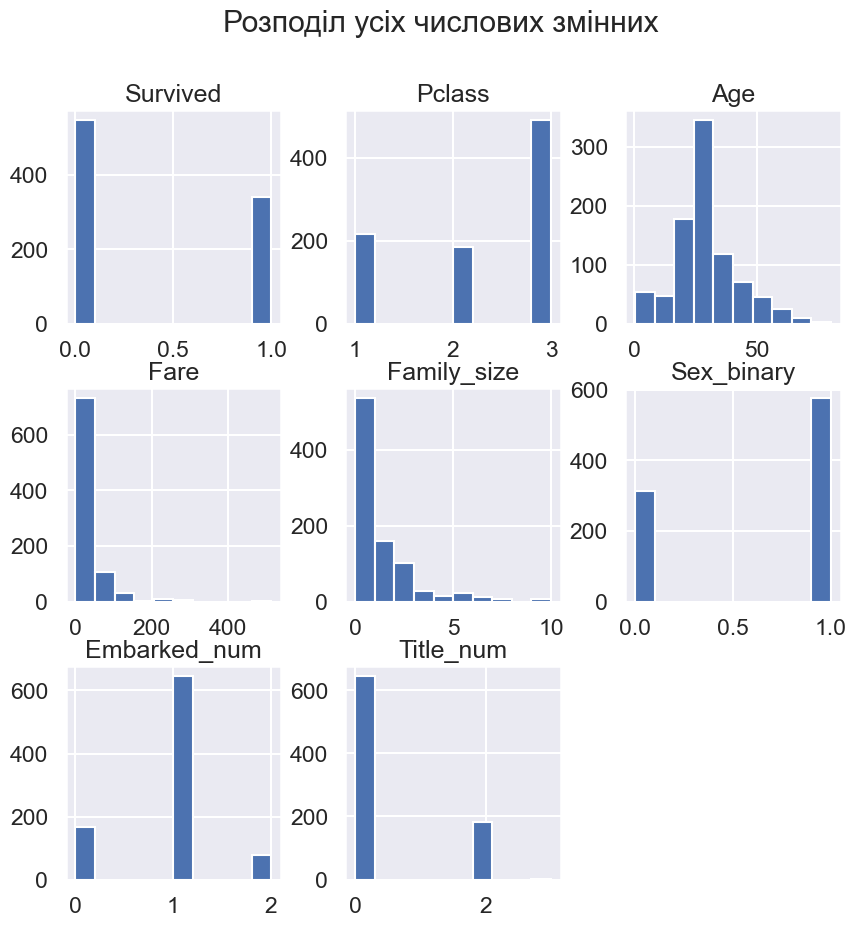

In [110]:
plt.figure(figsize = (10, 10))
titanic_df.select_dtypes(include=['float64', 'int64']).hist(ax = plt.gca())
plt.gcf().suptitle("Розподіл усіх числових змінних")
plt.show()

**Ваші висновки**: виконавши 'Завдання 11', ми відобразили розподіл числових даних на графіку, що може допомогти в розумінні датасету ще краще.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

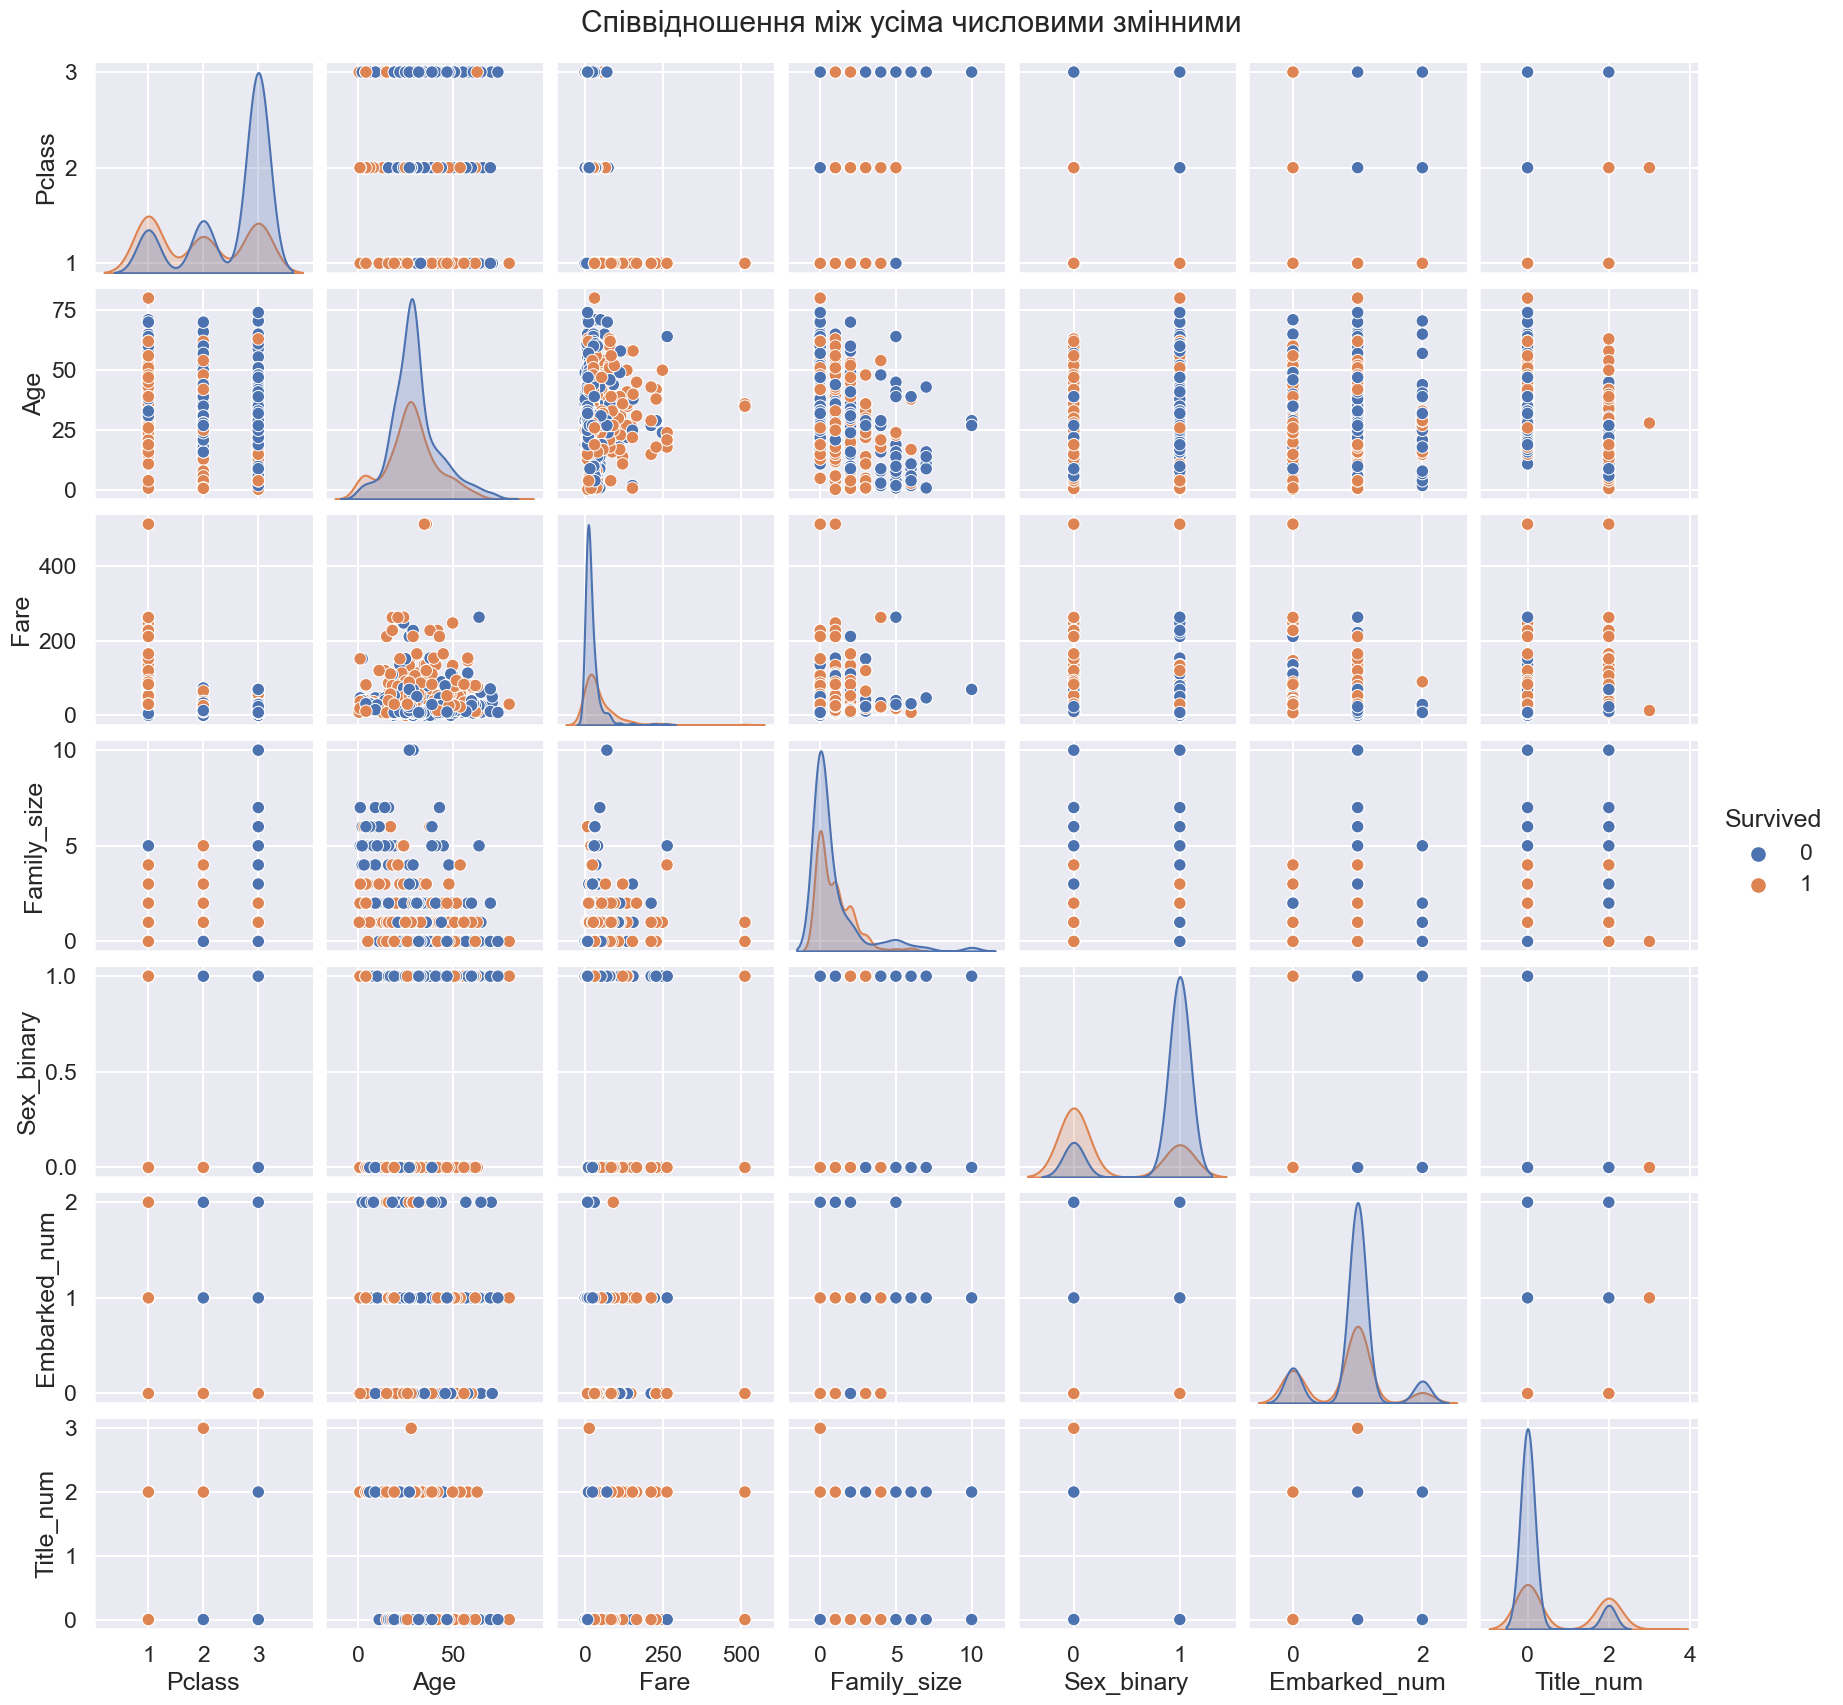

In [112]:
sns.pairplot(titanic_df.select_dtypes(include=['float64', 'int64']), hue='Survived')
plt.gcf().suptitle('Співвідношення між усіма числовими змінними')
plt.gcf().subplots_adjust(top=0.95)
plt.show()

**Ваші висновки**: виконавши 'Завдання 12', ми створили попарне співвідношення числових атрибутів. Більшість із співвідношень не являються значимими для аналізу, але виділяються деякі, наприклад кількість виживших жінок порівнянно до кількісті виживших чоловіків, як бачимо, перших більше вижило.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.